In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import re

> **1. (b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data**

In [2]:
def list_dir(path):
    return sorted(glob.glob(os.path.join(path, '*')))

data_root = '../data/AReM/'
activity_dir = ["bending1", "bending2", "cycling", "lying", "sitting", "standing", "walking"]
columns = ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']

train_data = []
test_data = []

count = 0
file_idx = 2
data_dict = dict()

for activity in activity_dir:
    path = data_root + activity
    list_data = list_dir(path)
    list_data = sorted(list_data, key = lambda x: int(re.match('\D*(\d+)', x).group(1)))
    
    if activity not in ['bending1', 'bending2']:
        file_idx = 3
    count = 0
    dataset_list = []
    for file in list_data:
        data = pd.read_csv(file, skiprows=5, header=None, names=columns) #skipping the initial comments in the file
        data = data.replace(np.nan, 0)
        dataset_list.append(data)
        count += 1
        if count <= file_idx:
            test_data.append(data)
        else:
            train_data.append(data)
    data_dict[activity] = dataset_list

data_dict

{'bending1': [       time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
  0         0      39.25       0.43      22.75       0.43      33.75       1.30
  1       250      39.25       0.43      23.00       0.00      33.00       0.00
  2       500      39.25       0.43      23.25       0.43      33.00       0.00
  3       750      39.50       0.50      23.00       0.71      33.00       0.00
  4      1000      39.50       0.50      24.00       0.00      33.00       0.00
  5      1250      39.25       0.43      24.00       0.00      33.00       0.00
  6      1500      39.25       0.43      24.00       0.00      33.00       0.00
  7      1750      39.00       0.00      23.75       0.43      33.00       0.00
  8      2000      39.50       0.50      24.00       0.00      33.00       0.00
  9      2250      39.50       0.50      23.00       0.00      33.00       0.00
  10     2500      39.50       0.50      23.25       0.43      33.00       0.00
  11     2750      39.50    

> **c (i) Research what types of time-domain features are usually used in time series classification and list them** <br>
Features like mean, maximum, minimum, standard deviation, median, count, 1st quartile, 3rd quartile

> **c (ii) Extract the time-domain features minimum, maximum, mean, median, standard deviation, 1st quartile, and 3rd quartile for all of the 6 time series in each instance**

In [5]:
from collections import defaultdict

stat_dict = defaultdict(dict)
num = 0
for activity in activity_dir:
    for dataset in data_dict[activity]:
        num += 1
        id_features = 0
        for col in columns[1:]:
            id_features += 1
            stats = dataset[col].describe()
            stat_dict[num]['min' + str(id_features)] = stats['min']
            stat_dict[num]['max' + str(id_features)] = stats['max']
            stat_dict[num]['mean' + str(id_features)] = stats['mean']
            stat_dict[num]['median' + str(id_features)] = stats['50%']
            stat_dict[num]['std' + str(id_features)] = stats['std']
            stat_dict[num]['firstQuartile' + str(id_features)] = stats['25%']
            stat_dict[num]['thirdQuartile' + str(id_features)] = stats['75%']
table = pd.DataFrame(stat_dict).T
table

,firstQuartile1,firstQuartile2,firstQuartile3,firstQuartile4,firstQuartile5,firstQuartile6,max1,max2,max3,max4,...,std3,std4,std5,std6,thirdQuartile1,thirdQuartile2,thirdQuartile3,thirdQuartile4,thirdQuartile5,thirdQuartile6
1,39.2500,0.0000,16.0000,0.0000,33.0000,0.0000,45.00,1.30,29.50,7.23,...,4.462952,0.965659,2.188449,0.582915,42.0000,0.5000,23.2500,1.1200,36.0000,1.3000
2,42.0000,0.0000,19.0000,0.0000,32.0000,0.0000,45.67,1.22,29.50,5.76,...,3.893737,1.047259,1.995255,0.601010,43.6700,0.5000,22.2500,1.1450,34.5000,1.3000
3,43.0000,0.0000,19.7500,0.0000,35.3625,0.0000,47.40,1.70,29.75,4.44,...,3.030943,0.550657,1.999604,0.513506,45.0000,0.5000,24.0000,0.8300,36.5000,0.9400
4,39.1500,0.0000,20.5000,0.4300,30.4575,0.0000,47.75,3.00,30.00,5.15,...,3.810469,0.953730,3.849448,0.524317,45.0000,1.1200,24.3725,1.3000,36.3300,1.0000
5,41.3300,0.4300,16.5000,0.4300,28.4575,0.0000,45.75,2.83,28.25,6.42,...,4.087107,0.928801,2.411026,0.389164,42.7500,0.7100,22.0625,1.1200,31.2500,0.5000
6,42.5000,0.0000,13.0000,0.4300,22.2500,0.4300,48.00,1.58,27.00,10.03,...,3.847638,0.995761,2.488862,0.622534,45.0000,0.5000,18.2700,1.1200,24.0000,0.8700
7,43.3100,0.4300,14.2500,0.0000,20.5000,0.0000,48.00,1.50,26.33,5.17,...,3.742420,0.788985,3.318301,0.487826,44.6700,0.5000,18.0000,0.9400,23.7500,0.8300
8,23.1875,0.0000,18.0000,0.0000,20.5000,0.4300,51.00,6.87,25.33,6.76,...,4.299612,0.927048,3.693786,0.693720,26.5000,0.7100,22.0000,0.8700,27.0000,0.8700
9,25.5000,0.0000,18.0000,0.0000,15.0000,0.4700,42.75,7.76,35.00,5.76,...,3.826268,0.904436,5.053642,1.012342,30.0000,0.5000,22.5000,0.9400,20.7500,1.3000
10,26.1875,0.0000,10.0000,0.4300,17.6700,0.4700,50.00,9.90,28.25,7.40,...,5.883266,1.027013,5.032424,1.332980,34.5000,0.8225,18.0000,1.1200,23.5000,1.3000


> **c (iii) Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python's bootstrapped or any other method to build a 90% bootsrap confidence interval for the standard deviation of each feature**

In [6]:
import statistics
import scipy as sp
import scipy.stats
import warnings
warnings.filterwarnings('ignore')

# Calculate 90% confidence interval on all the std values
def bootstrap_interval(data, sample_time, confidence=0.1): 
    std_dev = list()
    for i in range(sample_time): #sampling the score in the given sampling time (argument)
        indices = np.random.randint(0, len(data), size=len(data))
        sample = data[indices]
        sample_result = np.std(sample)
        std_dev.append(sample_result)
    # Confidence is 90%
    x = 1-confidence
    k1 = int(sample_time * x / 2)
    k2 = int(sample_time * (1-x/2))
    sorted_sample = sorted(std_dev)
    lower = sorted_sample[k1]
    higher = sorted_sample[k2]
    return round(lower, 2), round(higher, 2)

result = defaultdict(list)
for col in table:
    result[col].append(statistics.stdev(table[col]))     # standard deviation calc
    result[col].append(bootstrap_interval(table[col], 10))
    
print(pd.DataFrame.from_dict(result, orient='index', columns = ['std_dev', 'interval']))

                  std_dev       interval
firstQuartile1   7.264299    (6.8, 6.82)
firstQuartile2   0.946386   (0.92, 0.94)
firstQuartile3   4.358157   (4.31, 4.33)
firstQuartile4   0.843620   (0.79, 0.79)
firstQuartile5   6.261858    (6.4, 6.41)
firstQuartile6   0.763300   (0.75, 0.77)
max1             6.414651   (5.92, 6.41)
max2             5.075845   (4.93, 4.95)
max3             5.378333   (5.05, 5.38)
max4             2.286737   (2.24, 2.29)
max5             6.298931    (5.7, 5.99)
max6             2.611423   (2.46, 2.51)
mean1            6.695044   (6.49, 6.86)
mean2            1.576651   (1.49, 1.55)
mean3            4.239378   (4.07, 4.14)
mean4            1.172682   (1.17, 1.18)
mean5            5.922424   (6.21, 6.25)
mean6            1.163619   (1.14, 1.17)
median1          6.777133   (7.53, 7.65)
median2          1.412244    (1.4, 1.45)
median3          4.282748   (4.13, 4.24)
median4          1.150647   (1.12, 1.12)
median5          6.062462   (5.76, 6.08)
median6         

> **c (iv) Use your judgement to select the three most important time-domain features**

> Based on the principle of relatively clear separated distributions, a dense distribution is desired over a sparse distribution, i.e there should be clear decision boundaries. Based on this **mean, max and third quartile** are the important time-domain features in my opinion

#### ISLR 3.7.4

I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then fit a linear  regression model to the data, as well as a separate cubic regression, i.e. Y = β0 + β1X + β2X2 + β3X3 + ϵ.

(a) Suppose that the true relationship between X and Y is linear, i.e. Y = β0 + β1X + ϵ. Consider the training residual sum of
squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower
than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

> Would expect the training RSS of cubic regression to be lower than the RSS of linear regression as it has more predictors which allows it to be flexiblefits more closely for train data

(b) Answer (a) using test rather than training RSS.

> For test data, the cubic model has higher number of predictors and is more flexible which might lead to overfitting, which is why a lower RSS is expected for linear regression

(c) Suppose that the true relationship between X and Y is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

> Although the true relationship between X and Y is unknown, cubic regression will have more flexibility, resulting in a lower training RSS compared to linear regression

(d) Answer (c) using test rather than training RSS.

> Need more information to tell which one would be lower. It depends on the nature of the true relationship. Cubic regression might give a better test RSS in case of highly non-linear relationships, and linear regression might prove to be better in case of a slightly non-linear relationship

#### 2. Time Series Classification Part 2: Binary and Multiclass Classification

(a) Binary Classification Using Logistic Regression

> **i. Assume that you want to use the training set to classify bending from other activities, i.e. you have a binary classicfiation problem. Depict scatter plots of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities.**

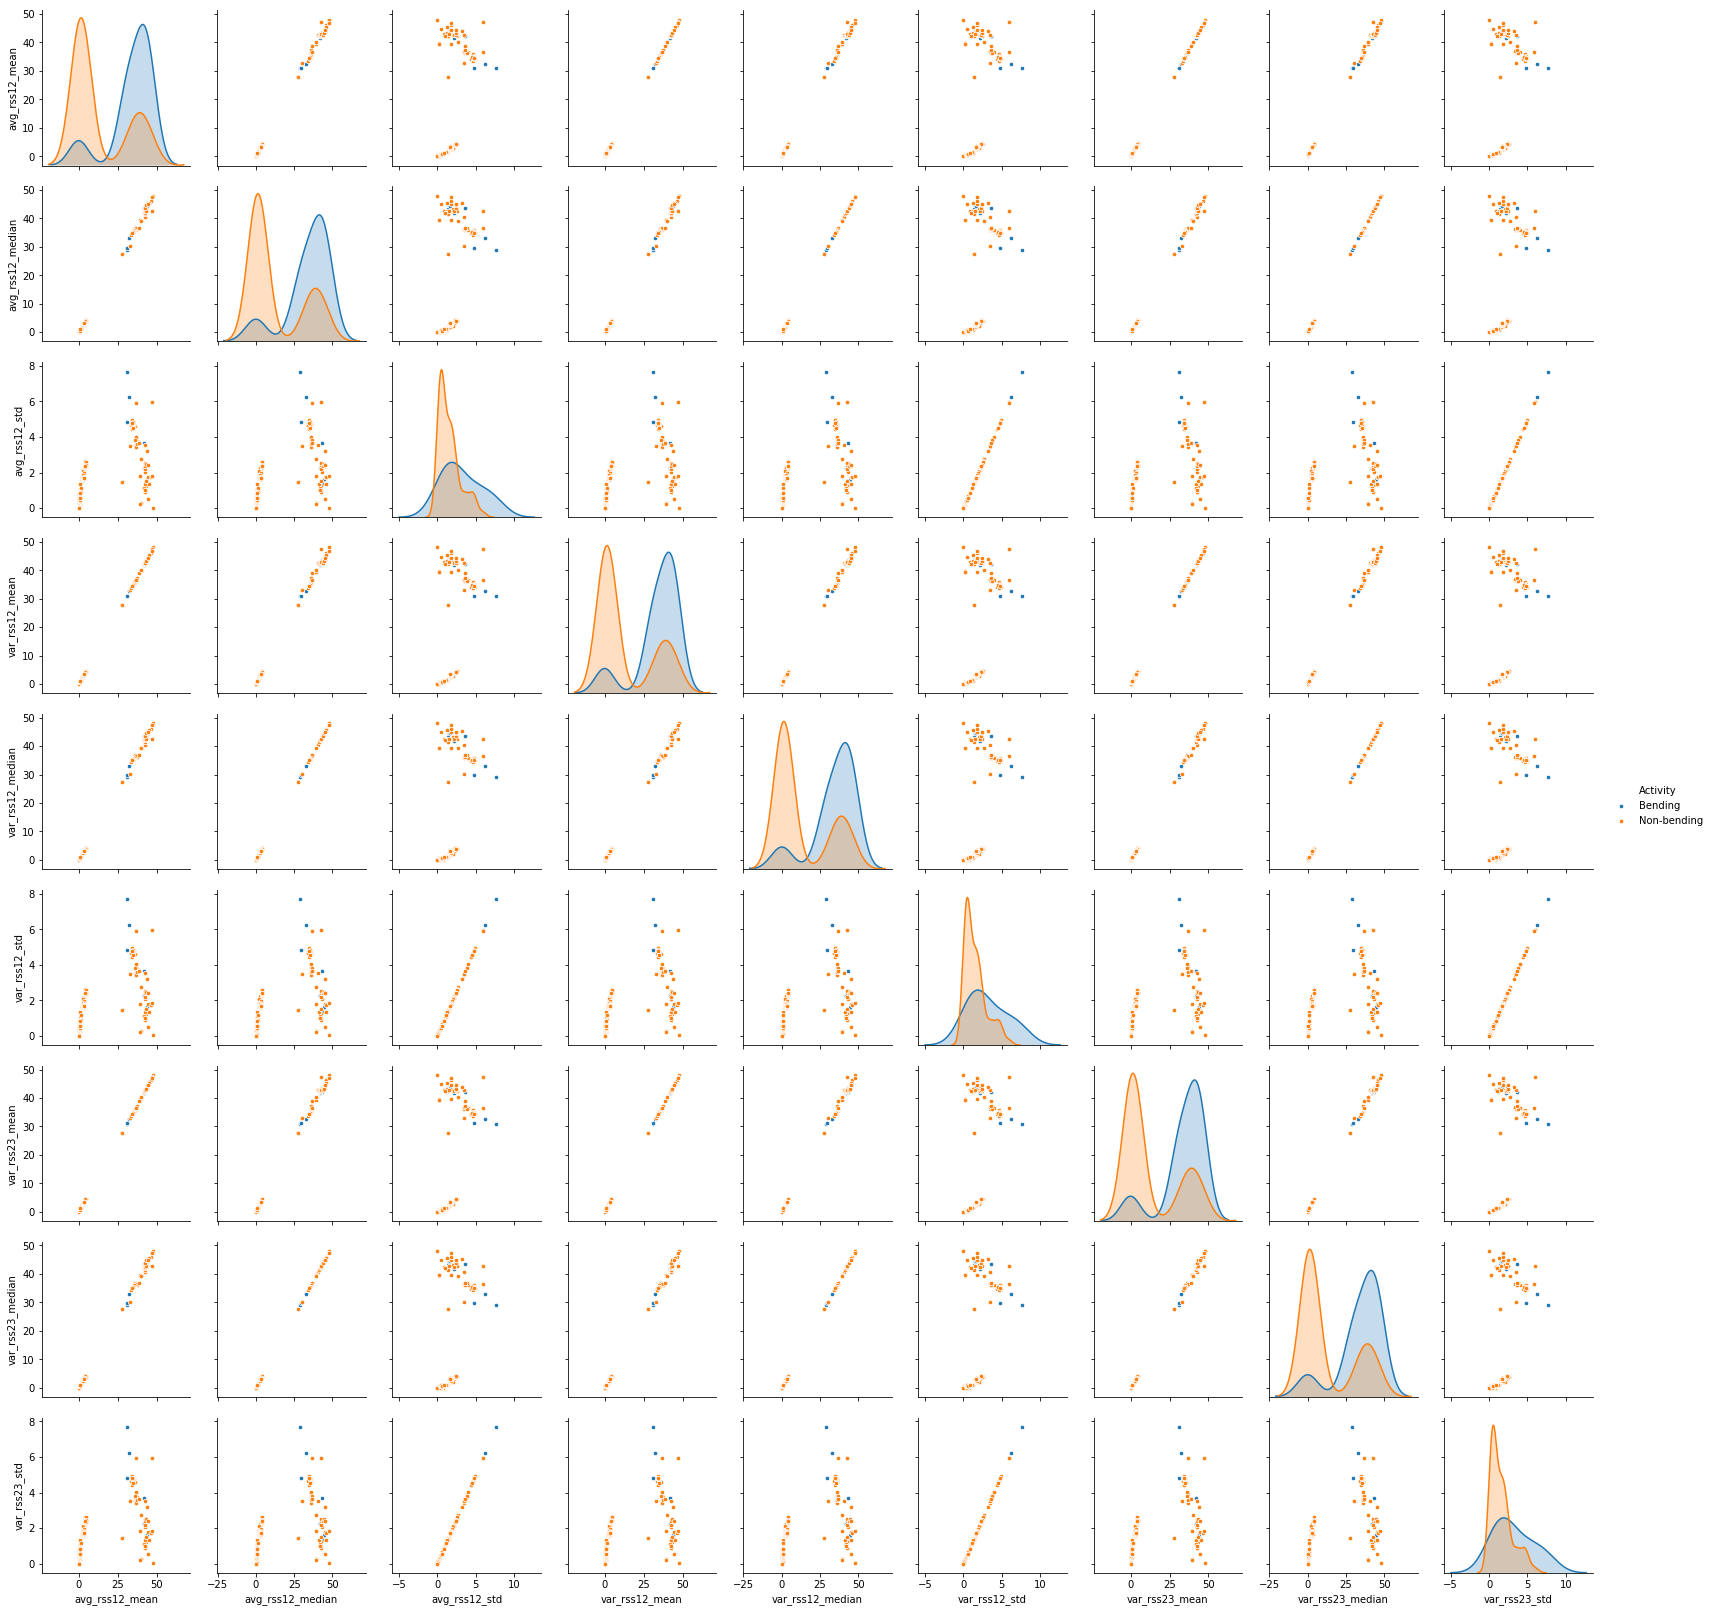

In [7]:
import seaborn as sns

# function to get pair plot for given series and selected features
def time_series_scatter_plot(selected_features, train_data):
    # new list for mean, std, median of each time series
    mean_values = list()
    std_values = list()
    median_values = list()
    bending_activity = list()
    # 0: non-bending, 1: bending
    cnt = 0
    feature_dict = {}
    for feature in selected_features:
        for s in train_data:
            cnt += 1
            stats = s[feature].describe()
            mean_values.append(stats['mean'])
            median_values.append(stats['50%'])
            std_values.append(stats['std'])
            if cnt <= 9:
                bending_activity.append('Bending')
            else:
                bending_activity.append('Non-bending')
        feature_dict[str(feature) + '_mean'] = mean_values
        feature_dict[str(feature) + '_median'] = median_values
        feature_dict[str(feature) + '_std'] = std_values
        feature_dict['Activity'] = bending_activity
    df = pd.DataFrame(feature_dict)
    graph = sns.pairplot(df, hue='Activity', plot_kws={'s':20}) #tag is the activity and point size = 20

#picking timeseries 1,2 and 6
selected_features = ['avg_rss12', 'var_rss12', 'var_rss23']
time_series_scatter_plot(selected_features, train_data)

> **ii. Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the training instances, you have 12 time series for each training instance. Repeat the experiment in 2(a)i, i.e depict scatter plots of the features extracted from both parts of the time series 1,2, and 6. Do you see any considerable difference in the results with those of 2(a)i?**

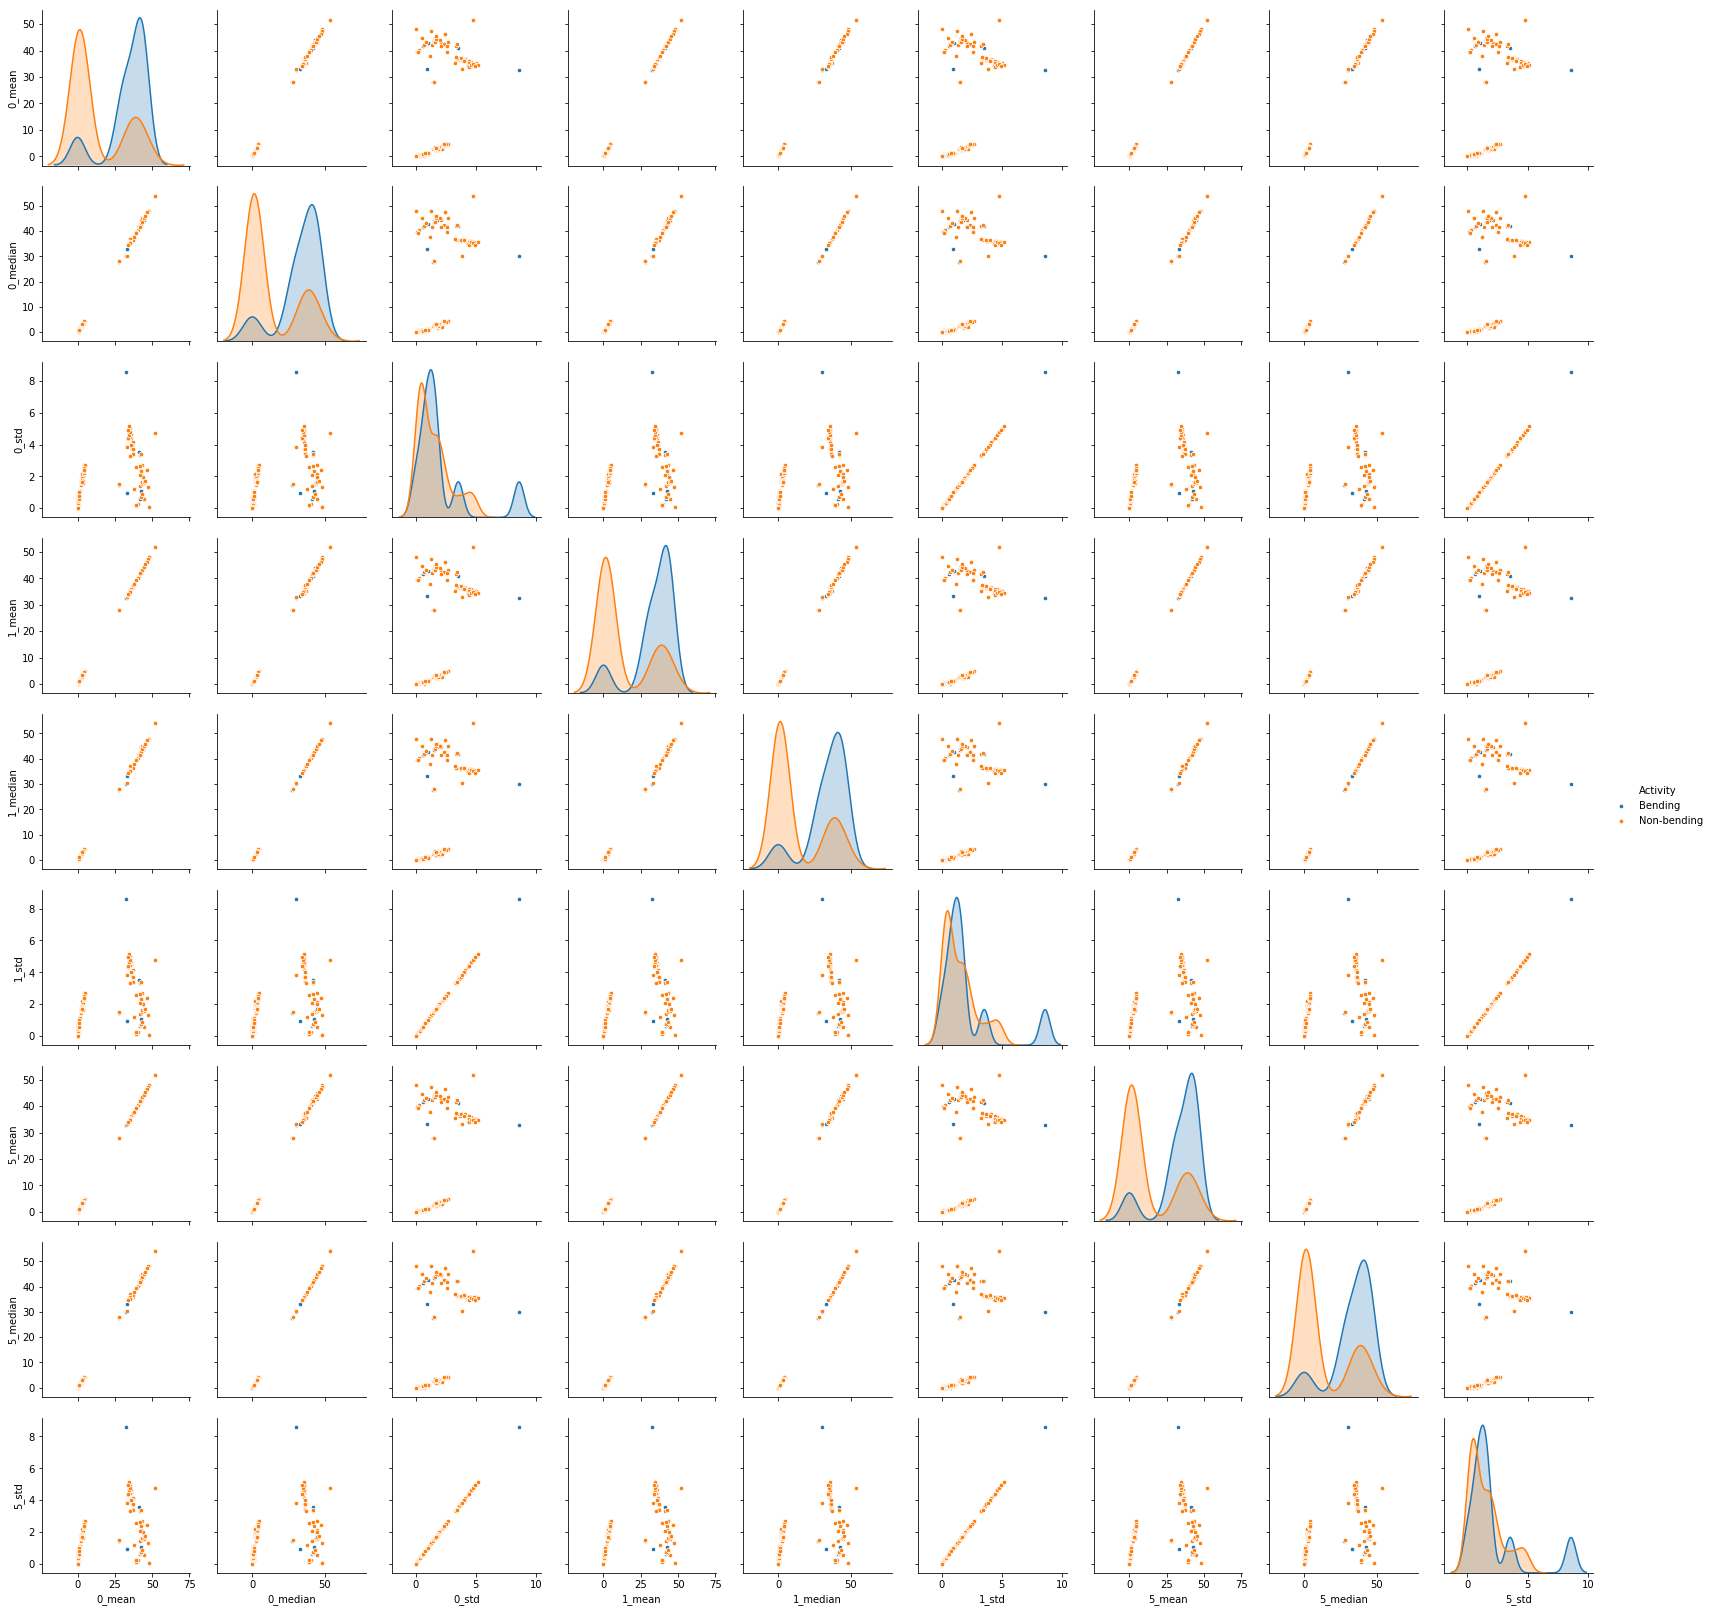

In [9]:
def time_series_break(dataset, parts):
    dataset_2 = list()
    for df in dataset:
        size = round(len(df)/parts)
        df_list = [df.iloc[i:i+size-1,:] for i in range(0, len(df),size)]
        temp_data = pd.DataFrame()
        for s in range(parts):
            df_list[s].index = range(len(df_list[s])) #rearrangement of indices before concatenating
            temp_data = pd.concat([df_list[s].iloc[:, 1:], temp_data], axis=1, ignore_index=True) #removing the time col
        dataset_2.append(temp_data)
    return dataset_2

selected_features = [0, 1, 5] #picking the time series features 1,2,6
new_train_data = time_series_break(train_data, 2) #breaking time series into 2 parts
time_series_scatter_plot(selected_features, new_train_data)

> There is no considerable difference in the timeseries results in comparison to 2 (a) i

> **iii. Break each time series in your training set into l ∈ {1, 2, . . . , 20} time series of approximately equal length and use logistic regression to solve the binary classification problem, using time-domain features.**

In [10]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')


def get_train_data(dataset, no_of_bending=9):
    #Bending: 1, Non-Bending: 0
    cnt = 0
    train_Y = list()
    train_X = list()
    for df in dataset:
        cnt += 1
        if cnt <= no_of_bending:
            train_Y.append(1)
        else:
            train_Y.append(0)
        train_X.append(df)
    return train_X, train_Y

def get_time_domain_data(datset_list):
    rows = list()
    data = list()
    for d in datset_list:
        for col in d:
            stats = d[col].describe()
            rows.append(stats['mean'])
            rows.append(stats['50%'])
            rows.append(stats['std'])
        data.append(rows)
        rows = []
    data = pd.DataFrame(data)
    return data

# interate values of l from 1 to 20
# perform logistic regression and cross validation for a given value of l
for l in range(1,21):
    new_train_data = time_series_break(train_data, l)
    r_data, train_Y = get_train_data(new_train_data)
    train_X = get_time_domain_data(r_data)
    model = LogisticRegression()
    
    rfe_model = RFECV(model, step = 1, cv = 5, scoring='accuracy') #creating the Recursive Feature Elimination model and selecting the best features
    rfe_model = rfe_model.fit(train_X, train_Y)
    F1_Score = f1_score(train_Y, rfe_model.predict(train_X))
    print('L:', l)
    print('F1 train score:', round(F1_Score, 2))
    print('P Value (Optimal number of features) :', rfe_model.n_features_)
    print('Best features :', train_X.columns[rfe_model.support_])
    print('----------------------------------------------')

L: 1
F1 train score: 0.89
P Value (Optimal number of features) : 6
Best features : Int64Index([0, 3, 12, 14, 15, 16], dtype='int64')
----------------------------------------------
L: 2
F1 train score: 1.0
P Value (Optimal number of features) : 30
Best features : Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 14, 15, 16, 17, 19,
            20, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35],
           dtype='int64')
----------------------------------------------
L: 3
F1 train score: 1.0
P Value (Optimal number of features) : 21
Best features : Int64Index([0, 1, 4, 8, 9, 10, 12, 14, 15, 16, 18, 20, 24, 26, 33, 34, 38, 43,
            48, 49, 51],
           dtype='int64')
----------------------------------------------
L: 4
F1 train score: 1.0
P Value (Optimal number of features) : 26
Best features : Int64Index([ 6,  7, 12, 13, 14, 15, 18, 19, 20, 21, 24, 25, 27, 28, 32, 33, 34,
            51, 52, 56, 61, 62, 66, 67, 68, 69],
           dtype='int64')
---------------------

> **RFECV is the right method for performing cross-validation and is much quicker than the p-values method**

> **iv. Report the confusion matrix and show the ROC and AUC for your classifier on train data. Report the parameters of your logistic regression βi’s as well as the p-values associated with them.**

In [11]:
new_train_data = time_series_break(train_data, 10) #l=10 with 4 optimal features
r_data, train_Y = get_train_data(new_train_data)
train_X = get_time_domain_data(r_data)
train_X = train_X.iloc[:, [73, 74, 156, 157]]

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     30.98
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           1.94e-14
Time:                        10:50:32   Log-Likelihood:                 9.1771
No. Observations:                  69   AIC:                            -10.35
Df Residuals:                      65   BIC:                            -1.418
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
73            -0.0102      0.002     -6.160      0.0

<Figure size 432x288 with 0 Axes>

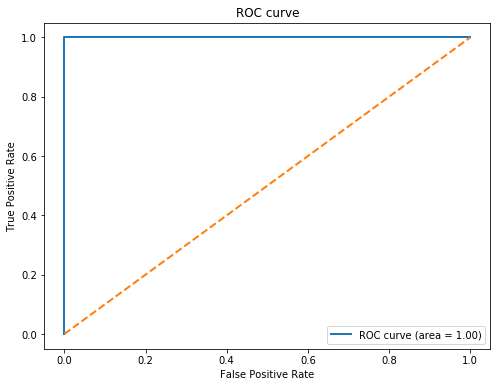

In [12]:
from sklearn import metrics
from sklearn import model_selection
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
import statsmodels.api as sm

#calculate p-values using OLS statsmodels
ols = sm.OLS(train_Y, train_X).fit()
print(ols.summary())
print('P-Values\n',ols.pvalues)


logistic_reg = LogisticRegression()
logistic_reg.fit(train_X,train_Y)
y_pred = logistic_reg.predict(train_X)
c_matrix = metrics.confusion_matrix(train_Y, y_pred)
print('confusion matrix\n', c_matrix)


y_score = logistic_reg.fit(train_X, train_Y).decision_function(train_X)

false_positive_rate,true_positive_rate,threshold = roc_curve(train_Y, y_score) 
roc_auc = auc(false_positive_rate,true_positive_rate)
 
plt.figure()
plt.figure(figsize=(8,6))
plt.plot(false_positive_rate,true_positive_rate, lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.show()

> **v. Test the classifier on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classifier has to be tested using the features extracted from the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously.**

In [13]:
#train data
new_train_data = time_series_break(train_data, 10)
r_data, train_Y = get_train_data(new_train_data)
train_X = get_time_domain_data(r_data)

#test data
new_test_data = time_series_break(test_data, 10)
r_data, test_Y = get_train_data(new_test_data, 4)
test_X = get_time_domain_data(r_data)

lg_model = LogisticRegression()
rfe_m = RFECV(lg_model, step = 1, cv = 5, scoring='accuracy')
rfe_m = rfe_m.fit(train_X, train_Y)

train_cv_score = rfe_m.score(train_X, train_Y)
test_cv_score = rfe_m.score(test_X, test_Y)

print('Train cross-validation score :', train_cv_score)
print('Test cross-validation score :', test_cv_score)

Train cross-validation score : 1.0
Test cross-validation score : 1.0


> **vi. Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?**

> There is instability inspite of the classes being well-separated

> **vii. From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.**

confusion matrix
 [[15  0]
 [ 0  4]]


<Figure size 432x288 with 0 Axes>

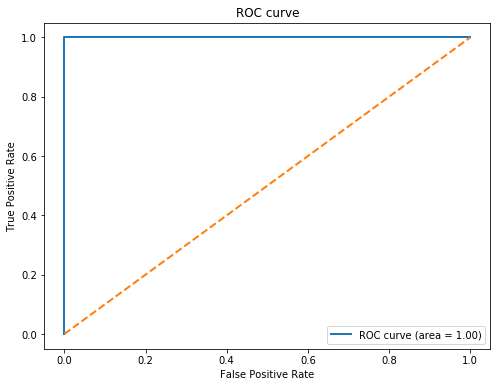

In [12]:
from imblearn.over_sampling import RandomOverSampler
#logistic_reg = LogisticRegression()
#logistic_reg.fit(test_X,test_Y)
#y_pred = logistic_reg.predict(test_X)
#c_matrix = metrics.confusion_matrix(test_Y, y_pred)
#print('confusion matrix\n', c_matrix)


#y_score = logistic_reg.fit(test_X, test_Y).decision_function(test_X)

#false_positive_rate,true_positive_rate,threshold = roc_curve(test_Y, y_score) 
#roc_auc = auc(false_positive_rate,true_positive_rate)

# oversampling
os = RandomOverSampler(random_state = 42)
x_data, y_data = os.fit_sample(train_X, train_Y)

logistic_reg = LogisticRegression()
logistic_reg.fit(x_data,y_data)
y_pred = logistic_reg.predict(x_data)
c_matrix = metrics.confusion_matrix(y_data, y_pred)
print('confusion matrix\n', c_matrix)


y_score = logistic_reg.fit(x_data, y_data).decision_function(x_data)

false_positive_rate,true_positive_rate,threshold = roc_curve(y_data, y_score) 
roc_auc = auc(false_positive_rate,true_positive_rate)
 
plt.figure()
plt.figure(figsize=(8,6))
plt.plot(false_positive_rate,true_positive_rate, lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.show()

#### (b) Binary Classification Using L1-penalized logistic regression

> **i. Repeat 2(a)iii using L1-penalized logistic regression, i.e. instead of using pvalues for variable selection, use L1 regularization. Note that in this problem, you have to cross-validate for both l, the number of time series into which you
break each of your instances, and λ, the weight of L1 penalty in your logistic regression objective function (or C, the budget). Packages usually perform cross-validation for λ automatically.**

In [14]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegressionCV

# logistic regression with L1 penalty
for l in range(1,21):
    new_train_data = time_series_break(train_data, l)
    r_data, train_Y = get_train_data(new_train_data)
    train_X = get_time_domain_data(r_data)
    # normalized data
    x_train_nor = preprocessing.scale(train_X)
    model = LogisticRegressionCV(penalty='l1', cv = 5, solver='saga', multi_class = "ovr",scoring = 'accuracy',refit="True").fit(x_train_nor, train_Y)
    score = model.score(x_train_nor, train_Y)
    print('Value of L:', l, '\tAccuracy:', score) 

Value of L: 1 	Accuracy: 0.9710144927536232
Value of L: 2 	Accuracy: 1.0
Value of L: 3 	Accuracy: 1.0
Value of L: 4 	Accuracy: 0.9565217391304348
Value of L: 5 	Accuracy: 0.9565217391304348
Value of L: 6 	Accuracy: 1.0
Value of L: 7 	Accuracy: 1.0
Value of L: 8 	Accuracy: 0.9710144927536232
Value of L: 9 	Accuracy: 1.0
Value of L: 10 	Accuracy: 0.9855072463768116
Value of L: 11 	Accuracy: 0.9710144927536232
Value of L: 12 	Accuracy: 0.9855072463768116
Value of L: 13 	Accuracy: 1.0
Value of L: 14 	Accuracy: 1.0
Value of L: 15 	Accuracy: 1.0
Value of L: 16 	Accuracy: 1.0
Value of L: 17 	Accuracy: 1.0
Value of L: 18 	Accuracy: 1.0
Value of L: 19 	Accuracy: 1.0
Value of L: 20 	Accuracy: 1.0


> **ii. Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement?**

> <br>1. L1-penalized model has a better performance on cross validation with good accuracy<br>
2.The L1-regularization is for implementation because, unlike selection using p-value, we do not need to mannually select the features after an intensive computing of p-values.

#### (c) Multi-class Classification (The Realistic Case)

> **i. Find the best l in the same way as you found it in 2(b)i to build an L1-penalized multinomial regression model to classify all activities in your training set.Report your test error. Research how confusion matrices and ROC curves are defined for multiclass classification and show them for this problem if possible**

In [15]:
def get_test_error(dataset, data_name):
    # 1,2 in bending, 1, 2, 3 in others as test data
    #      test = [2, 2, 3, 3, 3, 3, 3]
    #      train= [5, 4, 12, 12, 12, 12, 12]
    data_list = [7, 6, 15, 15, 15, 15, 15]
    train_Y = list()
    train_X = list()
    cnt = 0
    if data_name == 'test':
        for df in dataset:
            cnt += 1
            train_X.append(df)
            if cnt <= 4:
                train_Y.append(0)
            elif cnt >= 5 and cnt <= 7:
                train_Y.append(1)
            elif cnt >= 8 and cnt <= 10:
                train_Y.append(2)
            elif cnt >= 11 and cnt <= 13:
                train_Y.append(3)
            elif cnt >= 14 and cnt <= 16:
                train_Y.append(4)
            else:
                train_Y.append(5)
    else:
        for df in dataset:
            cnt += 1
            train_X.append(df)
            if cnt <= 9:
                train_Y.append(0)
            elif cnt >= 10 and cnt <= 21:
                train_Y.append(1)
            elif cnt >= 22 and cnt <= 33:
                train_Y.append(2)
            elif cnt >= 34 and cnt <= 45:
                train_Y.append(3)
            elif cnt >= 46 and cnt <= 57:
                train_Y.append(4)
            else:
                train_Y.append(5)
    
    return train_X, train_Y
for l in range(1, 21):
    new_train_data = time_series_break(train_data, l)
    r_data, train_Y = get_test_error(new_train_data, 'train')
    train_X = get_time_domain_data(r_data)
    
    new_test_X = time_series_break(test_data, l)
    r_data, test_Y = get_test_error(new_test_X, 'test')
    test_X = get_time_domain_data(new_test_X)
    model = LogisticRegressionCV(penalty = 'l1', solver='saga', cv=5, multi_class='multinomial', scoring = 'accuracy').fit(train_X, train_Y)
    score = model.score(test_X, test_Y)
    print('Value of L:', l, '\tAccuracy:', round(score, 5))

Value of L: 1 	Accuracy: 0.94737
Value of L: 2 	Accuracy: 0.84211
Value of L: 3 	Accuracy: 0.84211
Value of L: 4 	Accuracy: 0.84211
Value of L: 5 	Accuracy: 0.84211
Value of L: 6 	Accuracy: 0.78947
Value of L: 7 	Accuracy: 0.84211
Value of L: 8 	Accuracy: 0.89474
Value of L: 9 	Accuracy: 0.84211
Value of L: 10 	Accuracy: 0.89474
Value of L: 11 	Accuracy: 0.84211
Value of L: 12 	Accuracy: 0.89474
Value of L: 13 	Accuracy: 0.89474
Value of L: 14 	Accuracy: 0.89474
Value of L: 15 	Accuracy: 0.84211
Value of L: 16 	Accuracy: 0.89474
Value of L: 17 	Accuracy: 0.84211
Value of L: 18 	Accuracy: 0.84211
Value of L: 19 	Accuracy: 0.89474
Value of L: 20 	Accuracy: 0.84211


In [16]:
#using l=1 for ROC
new_train_data = time_series_break(train_data, 1)
r_data, train_Y = get_test_error(new_train_data, 'train')
train_X = get_time_domain_data(r_data)

new_test_X = time_series_break(test_data, 1)
r_data, test_Y = get_test_error(new_test_X, 'test')
test_X = get_time_domain_data(new_test_X)
model = LogisticRegressionCV(penalty = 'l1', solver='saga', cv=5, multi_class='multinomial', scoring = 'accuracy').fit(train_X, train_Y)
score = model.score(test_X, test_Y)
y_test_predict = model.predict(test_X)

c_matrix = metrics.confusion_matrix(test_Y, y_test_predict, labels=[0,1,2,3,4,5])
print('confusion matrix\n', c_matrix)

confusion matrix
 [[4 0 0 0 0 0]
 [0 3 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 2 1 0]
 [0 0 0 0 3 0]
 [0 0 0 0 0 3]]


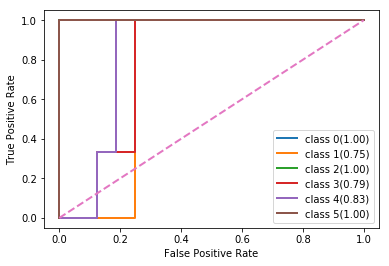

In [17]:
# draw ROC
y_scores = model.decision_function(test_X)

true_positive_values = dict()
false_positive_values = dict()
roc_auc = dict()

for i in range(6):
    false_positive_values[i], true_positive_values[i],_ = roc_curve(test_Y, y_scores[:, i],pos_label=i)
    roc_auc[i] = auc(false_positive_values[i], true_positive_values[i])

plt.figure()
for i in range(6):
    plt.plot(false_positive_values[i],true_positive_values[i],lw=2,label=f'class {i}(%0.2f)'%roc_auc[i])

    
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

> **ii. Repeat 2(c)i using a Naive Bayes classifier. Use both Gaussian and Multinomial priors and compare the results.**

In [18]:
from sklearn.naive_bayes import GaussianNB
for l in range(1, 21):
    new_train_data = time_series_break(train_data, l)
    r_data, train_Y = get_test_error(new_train_data, 'train')
    train_X = get_time_domain_data(r_data)

    new_test_X = time_series_break(test_data, l)
    r_data, test_Y = get_test_error(new_test_X, 'test')
    test_X = get_time_domain_data(new_test_X)
    
    model = GaussianNB()
    model.fit(train_X, train_Y)
    score = model.score(test_X, test_Y)
    print('value of L:', l, '\tAccuracy:', round(score, 5))

value of L: 1 	Accuracy: 0.89474
value of L: 2 	Accuracy: 0.78947
value of L: 3 	Accuracy: 0.84211
value of L: 4 	Accuracy: 0.89474
value of L: 5 	Accuracy: 0.89474
value of L: 6 	Accuracy: 0.84211
value of L: 7 	Accuracy: 0.84211
value of L: 8 	Accuracy: 0.84211
value of L: 9 	Accuracy: 0.84211
value of L: 10 	Accuracy: 0.84211
value of L: 11 	Accuracy: 0.84211
value of L: 12 	Accuracy: 0.84211
value of L: 13 	Accuracy: 0.84211
value of L: 14 	Accuracy: 0.89474
value of L: 15 	Accuracy: 0.84211
value of L: 16 	Accuracy: 0.84211
value of L: 17 	Accuracy: 0.84211
value of L: 18 	Accuracy: 0.84211
value of L: 19 	Accuracy: 0.89474
value of L: 20 	Accuracy: 0.84211


confusion matrix
 [[4 0 0 0 0 0]
 [0 3 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 2 1 0]
 [0 0 0 1 2 0]
 [0 0 0 0 0 3]]


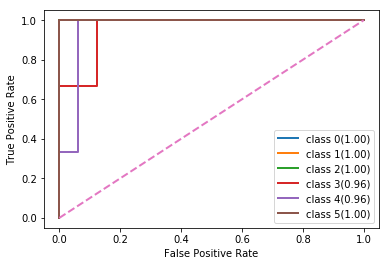

In [19]:
# l = 4 for ROC
new_train_data = time_series_break(train_data, 4)
r_data, train_Y = get_test_error(new_train_data, 'train')
train_X = get_time_domain_data(r_data)

new_test_X = time_series_break(test_data, 4)
r_data, test_Y = get_test_error(new_test_X, 'test')
test_X = get_time_domain_data(new_test_X)
    
model = GaussianNB()
model.fit(train_X, train_Y)
y_test_predict = model.predict(test_X)

c_matrix = metrics.confusion_matrix(test_Y, y_test_predict, labels=[0,1,2,3,4,5])
print('confusion matrix\n', c_matrix)

y_scores = model.predict_log_proba(test_X)
    
true_positive_values = dict()
false_positive_values = dict()
roc_auc = dict()

for i in range(6):
    false_positive_values[i], true_positive_values[i],_ = roc_curve(test_Y, y_scores[:, i],pos_label=i)
    roc_auc[i] = auc(false_positive_values[i], true_positive_values[i])

plt.figure()
for i in range(6):
    plt.plot(false_positive_values[i],true_positive_values[i],lw=2,label=f'class {i}(%0.2f)'%roc_auc[i])
    
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### ISLR 4.8.3

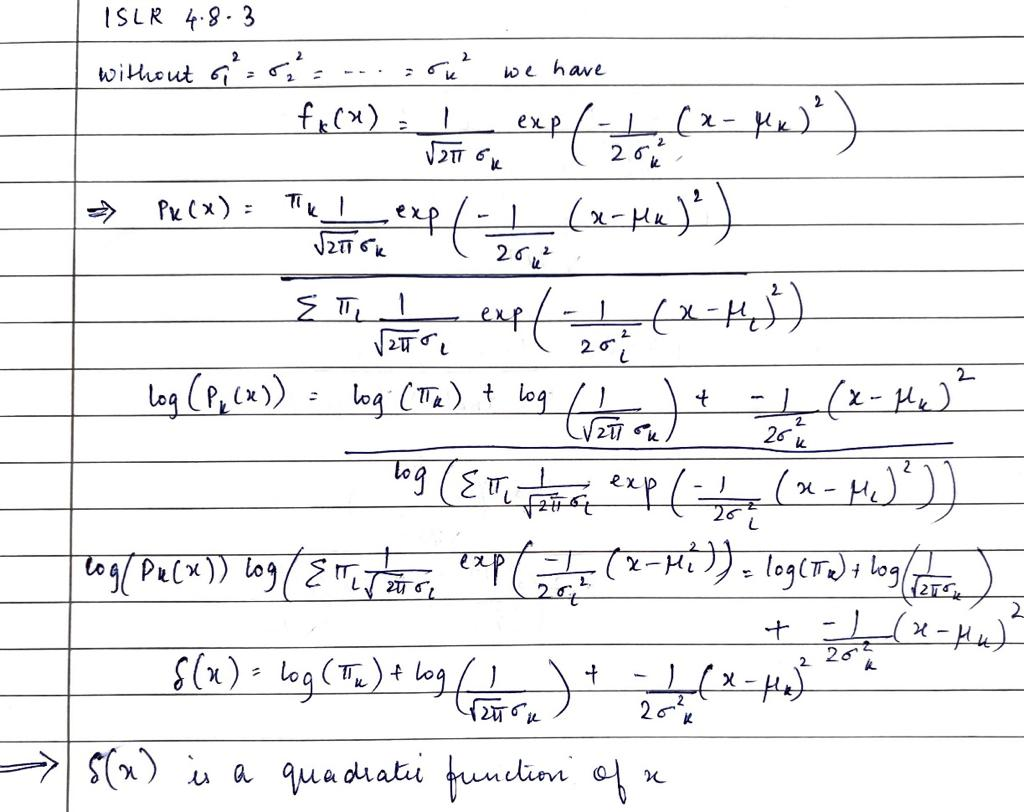

### ISLR 4.8.7

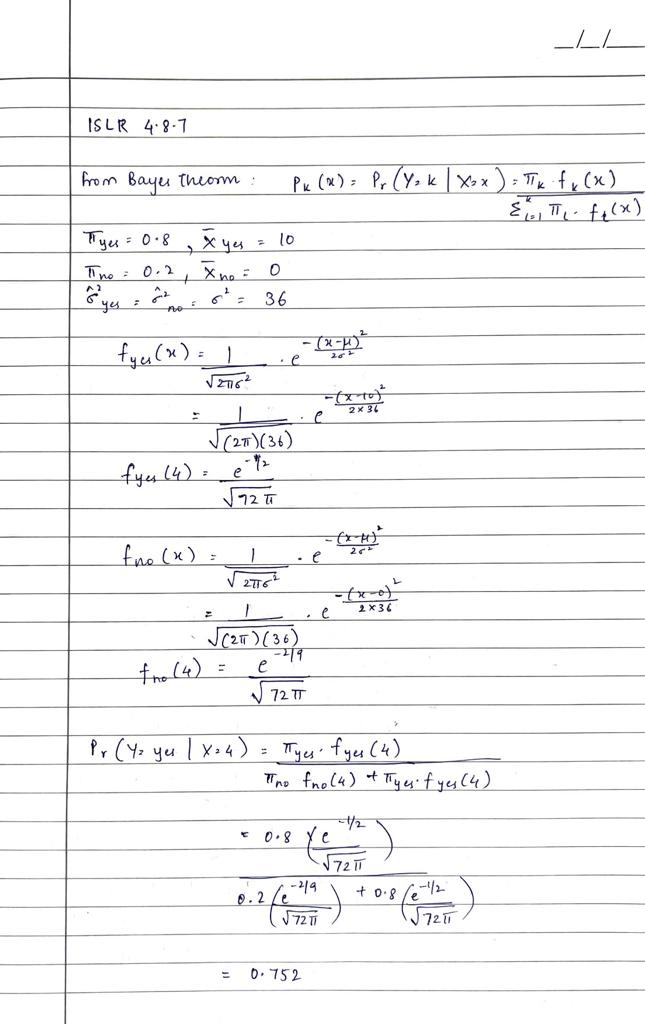

In [ ]:
#https://www.geeksforgeeks.org/how-to-use-glob-function-to-find-files-recursively-in-python/
#https://docs.python.org/3/library/re.html
#https://stats.stackexchange.com/questions/50807/features-for-time-series-classification
#https://stackoverflow.com/questions/5900578/how-does-collections-defaultdict-work
#https://towardsdatascience.com/calculating-confidence-interval-with-bootstrapping-872c657c058d
#https://www.sciencedirect.com/topics/mathematics/relative-frequency-distribution
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html
#https://www.kaggle.com/code/vinicius150987/logistic-regression-rfe
#https://stackoverflow.com/questions/31059123/scikit-learn-feature-reduction-using-rfecv-and-gridsearch-where-are-the-coeff
#https://stats.stackexchange.com/questions/451480/feature-selection-for-logistic-regression
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html